# Training a Perceptron

In this module, we will construct simple perceptron models. We'll start by implementing a perceptron model, and seeing how it behaves. We'll then outline the steps to train a perceptron to classify a point as above or below a line.

This discussion follows the excellent example and discussion at [The Nature of Code](https://natureofcode.com/book/chapter-10-neural-networks/). Please see that reference for additional details, and a more sophisticated coding strategy (using Classes in Python).

##  Preliminaries
Text preceded by a `#` indicates a 'comment'.  I will use comments to explain what we're doing and to ask you questions.  Also, comments are useful in your own code to note what you've done (so it makes sense when you return to the code in the future).  It's a good habit to *always* comment your code.  I'll try to set a good example, but won't always . . . 

Before beginning, let's load in the Python packages we'll need:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time

##  Part 1:   A simple perceptron model.

 
Let's examine a simple perceptron that accepts inputs, processes those inputs, and returns an output. To do so, please consider this function:

In [2]:
def my_perceptron(input1, input2, w1, w2, theta):
    # Define the activity of the perceptron, x.
    x = input1*w1 + input2*w2 + theta
    
    # Apply a binary threshold,
    if x > 0:
        return 1
    else:
        return 0

<div class="alert alert-block alert-info">

**Q:** How many inputs does the function take?  How many outputs does it return?<p></p>

**Q:** Looking at this code, could you sketch a model of this perceptron?<p></p>

**Q:** Apply this function to different sets of inputs. Consider,<p></p>

  `input1 = 1, input2 = 0, w1 = 0.5, w2 = -0.5, theta = 0`<p></p>

  and<p></p>

  `input1 = 1, input2 = 0, w1 = 0.5, w2 = -0.5, theta = -1`<p></p>

  What do you find?
</div>

##   Part 2.  Build a perceptron classifier.

We'd like to create a method to train a perceptron to classify a point (x,y) as above or below a line. Let's implement this training procedure.

###  Step 1. Provide perceptron with inputs and known answer. 

  First, let's make a function that computes a line, and determines if 
  a given `y` value is above or below the line. We'll use this function
  to return the correct ("known") answer. Having known answers is
  important for training the perceptron. We'll use the known answers to
  tell the when it's right or wrong (i.e., when the perceptron makes an
  error).

  Let's define the function (`known_answer`) should take four inputs:

  - `slope`
  - `intercept`
  - `x`
  - `y`

where the (x,y) value is a point we choose on the plane. The function
  should return one output:

 - `desired_output`

where,

`desired_output = 1`, if the `y` value (the last input) is above the line,

`desired_putput = 0`, if the `y` value (the last input) is below the line.

Consider the function below:

In [3]:
def known_answer(slope, intercept, x, y):

  yline = slope*x + intercept  # Compute y-value on the line.
  if y > yline:                # If the input y value is above the line,
      return 1                 # ... indicate this with output = 1;
  else:                        # Otherwise, the input y is below the line,
      return 0

<div class="alert alert-block alert-info">

**Q:** Consider the (x,y) point,<p></p>

`x,y = 0.7,3` <p></p>

and the line with slope and intercept, <p></p>

`slope = 2` <br></br>
`intercept = 1`<p></p>

Is the (x,y) point above or below the line?<p></p>
<br>


**A:** To answer this, let's ask our function,
</div>

In [4]:
x,y = 0.7,3
slope = 2
intercept = 1
correct_answer = known_answer(slope, intercept, x, y)
print(correct_answer)

1


<div class="alert alert-block alert-info">

**A (Continued):** We find a `correct_answer` of 1.<p></p>

So, the point `(x,y)=(0.7,3)` is above the line with slope 2 and intercept 1.
</div>

### Step 2: Ask perceptron to guess an answer.

 Our next step is to compare our desired output (computed in Step 1) to
 the output guessed by the perceptron. To do so, we'll need to compute
 the *feedforward* solution for the perceptron (i.e., given the inputs
 and bias, determine the perceptron output). Let's do so,

In [5]:
def feedforward(x, y, wx, wy, wb):

  # Fix the bias.
  bias = 1

  # Define the activity of the neuron, activity.
  activity = x*wx + y*wy + wb*bias
  
  # Apply the binary threshold,
  if activity > 0:
      return 1
  else:
      return 0

This function takes five inputs:

 - `x`  = the x coordinate of the point we choose in the plane.
 - `y`  = the y coordinate of the point we choose in the plane.
 - `wx` = the weight of x input.
 - `wy` = the weight of y input.
 - `wb` = the weight of the bias.

And this function returns one output:
 
 - the perceptron's guess, is the point above (=1) or below (=0) the line.

<div class="alert alert-block alert-info">
**Q:**  Again consider the (x,y) point, <p></p>

`x,y = 0.7,3` <p></p>

and set initial values for the perceptron weights. Let's just set these all to 0.5;  our goal in the rest of this module will be to train the perceptron by adjusting these weights.  But for now,<p></p>

`wx,wy,wb = 0.5` <p></p>

Then, ask the perceptron for it's guess for it's guess, is the point above or below the line?<p></p>

</div>

In [6]:
x,y = 0.7,3
wx,wy,wb = 3*[0.5]
perceptron_guess = feedforward(x, y, wx, wy, wb)
print(perceptron_guess)

1


<div class="alert alert-block alert-info">

**A (Continued):** We find a `peceptron_guess` of 1.<br>
<p>

So, the perceptron guesses that the point `(x,y)=(0.7,3)` is above the line.

</div>

### Step 3: Compute the error.

 We've now answered the question "*Is the (x,y) point above the line?*" in 
 two ways:
 
 - the known answer, and 
 - the perceptron's guess.

Let's compute the error as the difference between these two answers:

In [7]:
error = correct_answer - perceptron_guess
print(error)

0


<div class="alert alert-block alert-info">
**Q:**  What do you find for the `error`? Does it make sense?
</div>

### Step 4: Adjust all weights according to the error.

 To update the weights, we'll use the expression,

 `new weight = weight + error * input * learning constant`

 We need to compute this for each weight `(wx, wy, wb)`.

 First, let's set the learning constant,

In [8]:
learning_constant = 0.01

Then, we can compute the new weights,

In [9]:
wx = wx + error*x   *learning_constant
wy = wy + error*y   *learning_constant
wb = wb + error*1   *learning_constant

Notice that, in the update to `wb` we use the fact that the bias equals 1.

<div class="alert alert-block alert-info">
**Q:**  What do you find for the new weights? Does it make sense?
</div>

### Step 5: Return to Step 1 and repeat ... 
 We could try to compute these repetitions by hand, for example by repeating
 the cells above. To do so, we'd choose a new point in the (x,y) plane,
 determine whether it's above the line 2x+1, ask the perceptron to guess
 whether it's above the line, then use the error to update the
 perceptron's weights. 

 But we want to evaluate this procedure 2000 times. Doing so by
 hand would be a total pain, and highly error prone. Instead, let's
 ask the computer to do the boring work of multiple repetitions. To do so,
 let's collect the code above, and examine 2000 (x,y) points chosen
 randomly in the plane. We'll wrap our code above inside a for-loop to
 make this efficient,

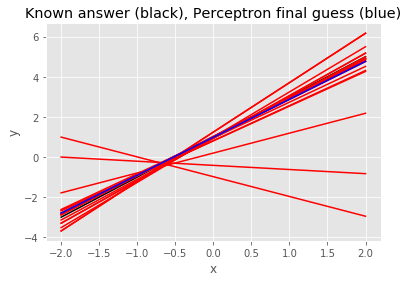

In [10]:
slope     = 2;                      # Define the line with slope, 
intercept = 1;                      # ... and intercept.

wx,wy,wz = 3*[0.5];                 # Choose initial values for the perceptron's weights

learning_constant = 0.01;           # And, set the learning constant.

estimated_slope = np.zeros(2000)    # Variables to hold the perceptron estimates.
estimated_intercept = np.zeros(2000)

for k in np.arange(2000):           # For 2000 iteractions,
    x = np.random.randn(1);         # Choose a random (x,y) point in the plane
    y = np.random.randn(1);
                                    # Step 1: Calculate known answer.
    correct_answer = known_answer(slope, intercept, x, y);
    
                                    # Step 2. Ask perceptron to guess an answer.
    perceptron_guess = feedforward(x, y, wx, wy, wb);
    
                                    # Step 3. Compute the error.
    error = correct_answer - perceptron_guess;
    
                                    # Step 4. Adjust weights according to error.
    wx = wx + error*x*learning_constant;
    wy = wy + error*y*learning_constant;
    wb = wb + error*1*learning_constant;
     
    estimated_slope[k] = -wx/wy;    # Compute estimated slope from perceptron.
    estimated_intercept[k] = -wb/wy;# Compute estimated intercept from perceptron.

# Display the results! ------------------------------------------------------------------------
x_range = np.linspace(-2,2,100);                  # For a range of x-values,
fig, ax = plt.subplots()
ax.plot(x_range, slope*x_range+intercept, 'k')    # ... plot the true line,

for k in range(1,2000,100):                       # ... and plot some intermediate perceptron guess
    ax.plot(x_range, estimated_slope[k]*x_range+estimated_intercept[k], 'r')
                                                  # ... and plot the last perceptron guess
ax.plot(x_range, estimated_slope[-1]*x_range+estimated_intercept[-1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Known answer (black), Perceptron final guess (blue)');